# Session 2: Python


## Session 1 Recap

Heat transfer is a branch of engineering science that studies the transfer of energy due to solely to temperature differences. 

There are wide-ranging applications from aerospace, to materials science, to electrochemical energy storage. 

There are 3 basic and *distinct* modes of heat transfer: conductive, convective and radiative. Convective heat transfer involves a moving fluid, radiative heat transfer involves electromagnetic waves. 

Fourier's Law of Heat Conduction in one dimension: $q\ =\ -kA \frac{dT}{dx}$. 





# Python Basics

**Python is a programming language that is open source, containing lots of useful libraries, less verbose than C/Java (does the same thing with fewer lines of code) and in 2024, a great scientific computing environment.**

Many engineering firms use MATLAB, and are increasingly using Python for this reason. However, it's worth stating that for significant computing efforts in industry, C++ is much, much faster (Python is slow, which is its main disadvantage when scaling)

In this course, we'll use Python because its relatively easy to learn and accessible for teaching and research purposes. 

## Packages

In any Python script you first import all packages that you need. 

The best way to learn about packages you need and their functionalities is to just google them. For instance, *matplotlib* has comprehensive documentation on plotting commands: https://matplotlib.org/stable/gallery/index.html 

*numpy* is another common package for mathematical calculations and manipulations

*pandas* is a common package for database filtering, sorting, extracting 
 
If you get an error about missing the package, you probably need to download it. in your terminal, type: *pip install [PACKAGE]* where [PACKAGE] is the name of the package will do the trick



In [7]:
# [Description] Importing necessary libraries: pandas for data manipulation, numpy for numerical operations, and matplotlib for plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Defining variables, and doing math




In [8]:
# This code demonstrates the use of the range function and a for loop in Python

a = range(0,20)
print(a)

for b in a:
    print(b)


range(0, 20)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## Defining functions

Creating functions allows you to use/call that same function over and over instead of repeating the same lines of code

**remember, syntax for printing something out is *print(INSERT_TEXT_HERE)*

In [9]:
def function(a,b):
    return a**b
    
print(function(10,2))

100


## Plotting things!

Remember we imported the matplotlib plotting package as "plt" 

First, we create some values to plot (an array of evenly spaced numbers from 0 to 100 and the square of that)

We initialie a figure and then a subplot (111 refers to a 1 by 1 and the first plot. 211 would refer to a 2 by 1 and the first plot, 453 would refer to a 4 by 5 and the third plot, 8,8,63 would refer to a 8 by 8 and the 63 plot..etc..)

We can control this subplot to fine detail..set the x-axis label, y-axis label, title, even specific colors, fonts of each

plt.show to show the plot directly inline 

**any questions about syntax, go to the official matplotlib documentation, or for specific asks refer to stackoverflow or chatgpt (can sometimes be misleading or entirely incorrect though)

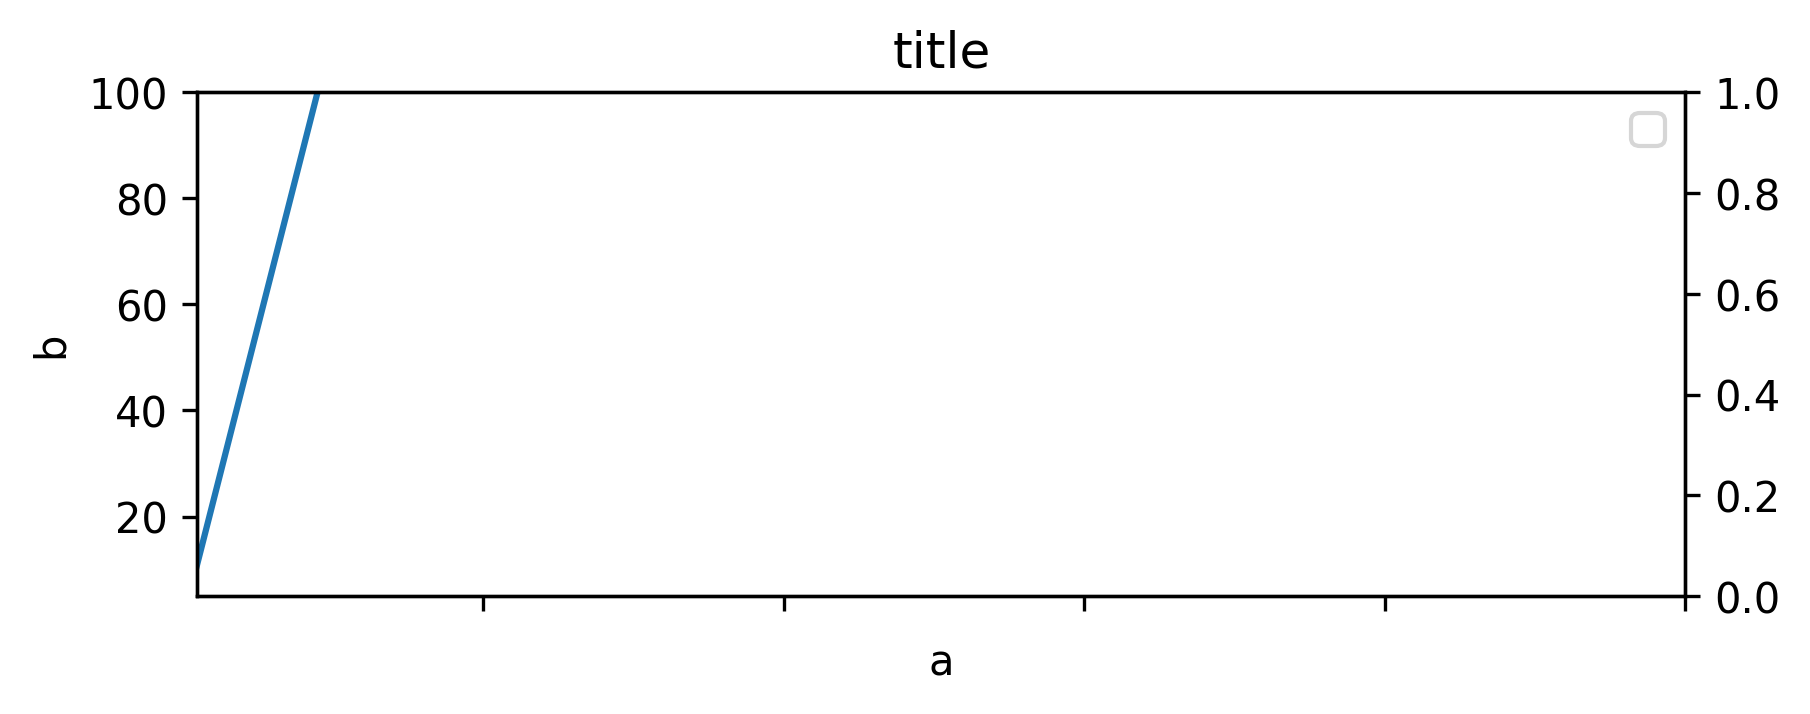

In [10]:
a = np.linspace(0,100,10)
b = a**2 

figure1 = plt.figure(dpi=300)
ax1 = figure1.add_subplot(211)

ax1.plot(a,b)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('title')

ax1.set_xlim(1,100)
ax1.set_ylim(5,100)

ax1.set_xticklabels([])
ax1.set_title('title')
ax1.legend(loc='best')

ax11 = ax1.twinx()


plt.show()




In [11]:
# Pandas dataframes

data = {
    'temperatures':[0, 10, 20, 30, 40, 50, 60, 70],
    'heat capacities':[4,5,6,4,5,6,4,3],
    'types':['gold','silver','iron','clay','stone','metal','zinc','cement']
}

df = pd.DataFrame(data)

# print(df)

# print(df.iloc[0])
print(df.iloc[0,2])

print(df.keys())

print(df['types'].iloc[0])

print(df[df['types']=='gold']['temperatures'])

# data_uploaded = df.read_csv('filetest.csv')

for d in df:
    print(d)

for i,d in enumerate(df):
    print(i,d)

for j,d in enumerate(df['types']):
    print(d)

    



gold
Index(['temperatures', 'heat capacities', 'types'], dtype='object')
gold
0    0
Name: temperatures, dtype: int64
temperatures
heat capacities
types
0 temperatures
1 heat capacities
2 types
gold
silver
iron
clay
stone
metal
zinc
cement


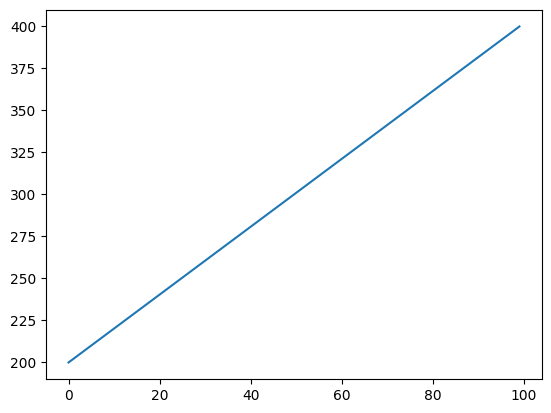

<Figure size 640x480 with 0 Axes>

In [12]:
# Credit: https://medium.com/@matiasortizdiez/beginners-introduction-to-natural-simulation-in-python-i-solving-the-heat-equation-bf0ae5d4c37f 

## Heating a Steel Rod
import numpy as np 

length = 10               # length of rod
k = .466                  # thermal conductivity of steel
temp_at_left_end = 200    # temperature at left side of rod
temp_at_right_end = 400   # temperature at right side of rod
total_time = 1000           # time sim will run for

dx = .1    # space in between points, the smaller the better
# defines the x domain as being from 0 to length and                  # having int(length/dx) points separated by a value dx, will 
# return an array containing all of the points
x_vec = np.linspace(0, length, int(length/dx))    

dt = .01    # space in between steps in time
# defines the time domain as being from 0 to total_time and                  # having int(total_time/dt) points, separated by steps of 
# value dt, returns an array containing all time steps
t_vec = np.linspace(0, total_time, int(total_time/dt))
# defines an empty 2D numpy array to store the values of u(t, x) as   # we solve for them
u = np.zeros([len(t_vec), len(x_vec)])

u[:, 0] = temp_at_left_end     # u(t, 0) = 200
u[:, -1] = temp_at_right_end   # u(t, length) = 200

for t in range(1, len(t_vec)-1):
    for x in range(1, len(x_vec)-1):
        u[t+1, x] = k * (dt / dx**2) * (u[t, x+1] - 2*u[t, x] + 
                    u[t, x-1]) + u[t, x]
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(u[-1,:])

plt.show()
plt.clf()


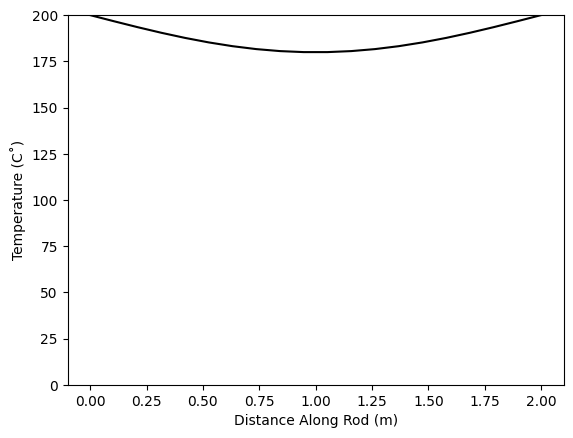

In [21]:
from IPython.display import HTML
from IPython.display import display #these are for displaying the animation in the jupyter notebook 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

# Define your variables and parameters
length = 2
k = .466
temp_left = 200
temp_right = 200
total_time = 2
dt = 0.01  # Time step
dx = 0.1  # Distance step

# Create time and distance vectors
t_vec = np.linspace(0, total_time, int(total_time/dt))
x_vec = np.linspace(0, length, int(length/dx))

# Initialize the temperature field
u = np.zeros([len(t_vec), len(x_vec)])

# Set initial conditions (e.g., a Gaussian pulse)
u[0] = np.exp(-0.5 * ((x_vec - length / 2) / 2)**2)
u[:, 0] = temp_left
u[:, -1] = temp_right

# Create a figure and axis for the animation
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    for x in range(1, len(x_vec) - 1):
        u[t + 1, x] = k * (dt / dx**2) * (u[t, x + 1] - 2 * u[t, x] + u[t, x - 1]) + u[t, x]

    ax.plot(x_vec, u[t], 'black')
    ax.set_ylabel("Temperature (C˚)")
    ax.set_xlabel("Distance Along Rod (m)")
    ax.set_ylim(0,200)

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t_vec)-1, repeat=False, blit=False)
f = 'animate_test.mp4'
# ani.save(f)

display(HTML(ani.to_jshtml()))

plt.show()


In [ ]:
## To explore yourself, https://colab.research.google.com/drive/1MP3Ec266T80mURuGF0bJJBK1dtHjX0uU?usp=sharing 
import pybamm

## https://docs.pybamm.org/en/latest/source/examples/notebooks/models/thermal-models.html 

full_thermal_model = pybamm.lithium_ion.SPMe(
    {"thermal": "x-full"}, name="full thermal model"
)
lumped_thermal_model = pybamm.lithium_ion.SPMe(
    {"thermal": "lumped"}, name="lumped thermal model"
)
models = [full_thermal_model, lumped_thermal_model]


parameter_values = pybamm.ParameterValues("Marquis2019")

full_params = parameter_values.copy()
full_params.update(
    {
        "Negative current collector"
        + " surface heat transfer coefficient [W.m-2.K-1]": 5,
        "Positive current collector"
        + " surface heat transfer coefficient [W.m-2.K-1]": 5,
        "Negative tab heat transfer coefficient [W.m-2.K-1]": 0,
        "Positive tab heat transfer coefficient [W.m-2.K-1]": 0,
        "Edge heat transfer coefficient [W.m-2.K-1]": 0,
    }
)

A = parameter_values["Electrode width [m]"] * parameter_values["Electrode height [m]"]
lumped_params = parameter_values.copy()
lumped_params.update(
    {
        "Total heat transfer coefficient [W.m-2.K-1]": 5,
        "Cell cooling surface area [m2]": 2 * A,
    }
)

params = [full_params, lumped_params]
# loop over the models and solve
sols = []
for model, param in zip(models, params):
    param["Current function [A]"] = 3 * 0.68
    sim = pybamm.Simulation(model, parameter_values=param)
    sim.solve([0, 3600])
    sols.append(sim.solution)


# plot
output_variables = [
    "Voltage [V]",
    "X-averaged cell temperature [K]",
    "Cell temperature [K]",
]
pybamm.dynamic_plot(sols, output_variables)

# plot the results
pybamm.dynamic_plot(
    sols,
    [
        "Volume-averaged cell temperature [K]",
        "Volume-averaged total heating [W.m-3]",
        "Current [A]",
        "Voltage [V]",
    ],
)


interactive(children=(FloatSlider(value=0.0, description='t', max=1154.8513550286173, step=11.548513550286172)…

interactive(children=(FloatSlider(value=0.0, description='t', max=1154.8513550286173, step=11.548513550286172)…

## Analogy to electrical circuits

1) Ohm's Law: $J\ =\ -\gamma \nabla V$

where J is the flux of electrical charge, $\gamma$ is the electrical conductivity, and V is the electric potential. In one dimension, this is V = IR

this is analogous to Fourier's Law, where the flux is proportional to the potential gradient 

2) Fick's Law: $j\ =\ -\rho D \nabla m$

where j is the mass flux, $\rho$ is the density, D is the diffusion coefficient, $\nabla m$ is the mass concentration gradient

the flux is proportional to the concentration gradient, also analogous 

## Lumped model

The lumped thermal model solves the following equation:

$\rho_{eff} \frac{\partial T}{\partial t}\ =\ Q\ -\ \frac{hA}{V(T\ -\ T_{\inf}) }$

Q, the heat source term, accounts for ohmic heating due to cell resistance (iR) + electrochemical reactions + entropic changes in the electrodes 